<a href="https://colab.research.google.com/github/ntust10733033/BRF_PriceCalculation/blob/master/%E5%85%B1%E6%95%B4%E5%90%88_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import套件


In [164]:
!pip install arch
!pip install scipy -U
!pip install matplotlib -U

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.3)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)


In [165]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
from arch.unitroot import ADF,KPSS
import numpy as np
from scipy import stats

### 新增中文字體(失敗..)

In [166]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2021-05-29 12:37:07--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.216.101, 173.194.216.102, 173.194.216.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ega014t74v3g7r1i8q9q3s4eu628qqpf/1622291775000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-05-29 12:37:09--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ega014t74v3g7r1i8q9q3s4eu628qqpf/1622291775000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

### 畫出分布

In [167]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BRF_RawData/df_2mon.csv",encoding='big5')

In [168]:
df.head()

,Unnamed: 0,交易日期,到期月份(週別),收盤價,交易年分,原日期,到期年份(週別)
0,0,7,9,2381.5,2018,2018-07-02,2018
1,5,7,9,2377.0,2018,2018-07-03,2018
2,10,7,9,2381.5,2018,2018-07-04,2018
3,15,7,9,2369.5,2018,2018-07-05,2018
4,20,7,9,2361.0,2018,2018-07-06,2018


In [169]:
del df['Unnamed: 0']
df.columns = ['交易月份','到期月份','收盤價','交易年分','原日期','到期年分']

In [170]:
df.index = df['原日期']

In [171]:
df = df.drop(columns=['原日期'],axis=1)

In [172]:
df.index = pd.to_datetime(df.index)

In [173]:
df['週別'] = df.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [174]:
df = df.astype(str)

In [175]:
df['week'] = df['交易年分'].map(str)+df['週別']
#pd.set_option('display.max_rows', None) #可使用此列，叫出全部資料檢查一下
df.head()

,交易月份,到期月份,收盤價,交易年分,到期年分,週別,week
原日期,,,,,,,
2018-07-02,7,9,2381.5,2018,2018,27,201827
2018-07-03,7,9,2377.0,2018,2018,27,201827
2018-07-04,7,9,2381.5,2018,2018,27,201827
2018-07-05,7,9,2369.5,2018,2018,27,201827
2018-07-06,7,9,2361.0,2018,2018,27,201827


In [176]:
#df.to_csv('週別.csv',encoding='big5')
#df.loc['2020-10']

行有餘力再來做: 用週資料跑回歸

In [177]:
#filter1 = df['交易月份']==1
#filter2 = df['交易年分']==2019

In [178]:
df['收盤價'] = df['收盤價'].astype(float)

In [179]:
#x = df[filter1 & filter2]['收盤價']
x = df['2019-01':'2019-04']['收盤價']
#x = df['2019-01']['收盤價']
x.head()
#x = df[filter2]['收盤價']

原日期
2019-01-02    1630.0
2019-01-03    1672.5
2019-01-04    1725.5
2019-01-07    1772.0
2019-01-08    1766.5
Name: 收盤價, dtype: float64

<AxesSubplot:>

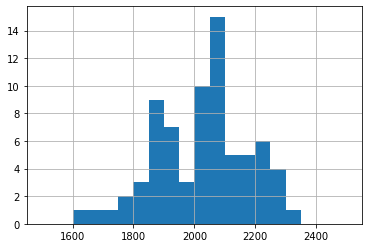

In [180]:
x.hist(bins=20,range=(1500,2500))


In [181]:
mrange = (df['收盤價'].min(),df['收盤價'].max())
mbin = 30

In [182]:
mon_list=['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
          '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
          '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12']

In [183]:
df[mon_list[0]]

,交易月份,到期月份,收盤價,交易年分,到期年分,週別,week
原日期,,,,,,,
2018-07-02,7,9,2381.5,2018,2018,27,201827
2018-07-03,7,9,2377.0,2018,2018,27,201827
2018-07-04,7,9,2381.5,2018,2018,27,201827
2018-07-05,7,9,2369.5,2018,2018,27,201827
2018-07-06,7,9,2361.0,2018,2018,27,201827
2018-07-09,7,9,2356.5,2018,2018,28,201828
2018-07-10,7,9,2380.0,2018,2018,28,201828
2018-07-11,7,9,2377.5,2018,2018,28,201828
2018-07-12,7,9,2275.0,2018,2018,28,201828


In [184]:
def build_mon(data,mon_list):
  for i in range(len(mon_list)):
    temp = data[mon_list[i]]['收盤價'].copy()
    a = pd.DataFrame({str(mon_list[i]):temp})
    sns_plot = sns.displot(data=a,kde=True)
    images_dir = '/content/drive/MyDrive/Colab Notebooks/png_output'
    filename = str(mon_list[i])
    sns_plot.savefig(f"{images_dir}/{filename}output.png")
    

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


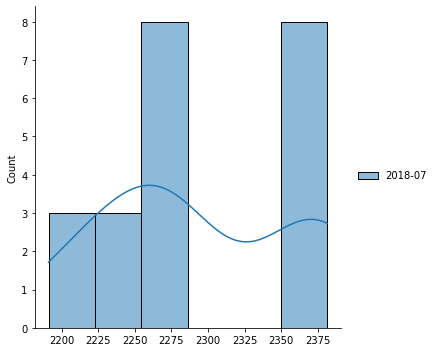

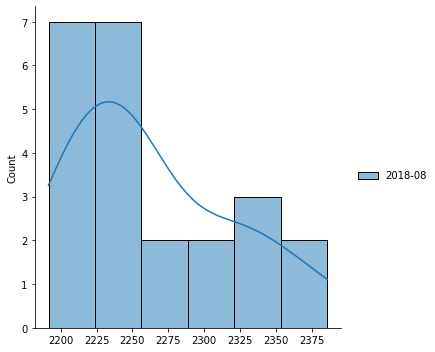

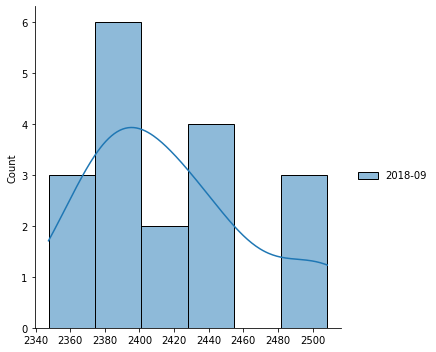

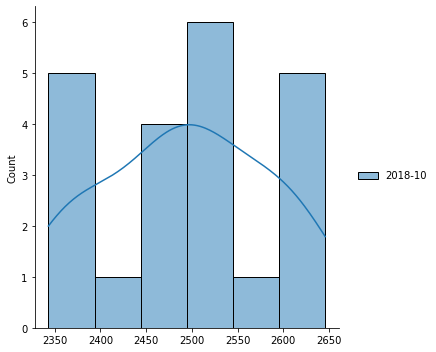

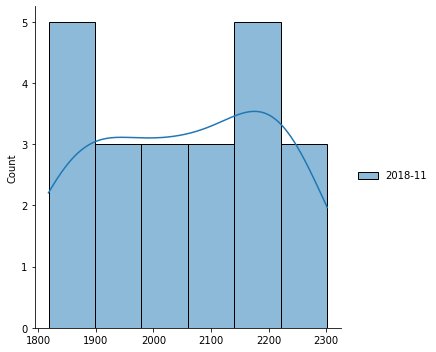

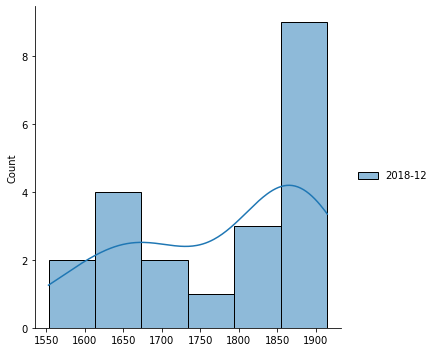

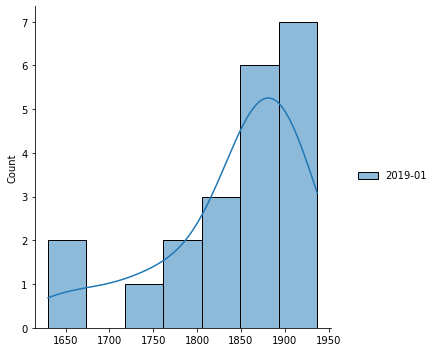

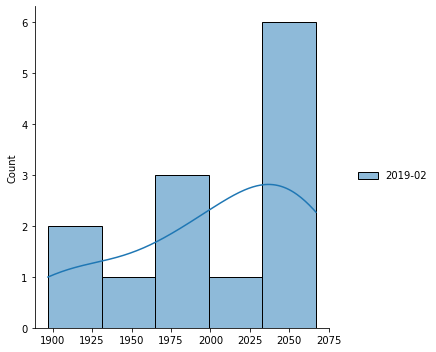

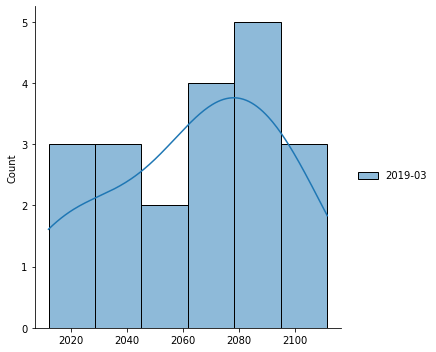

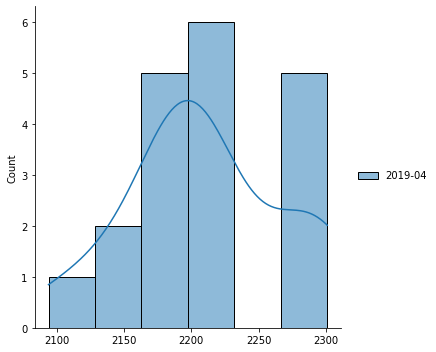

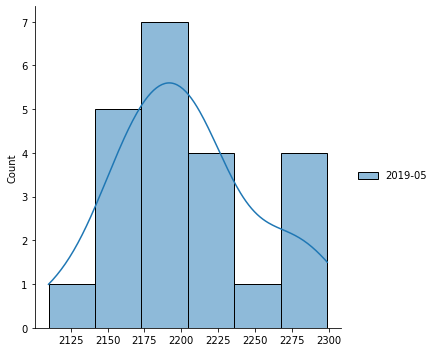

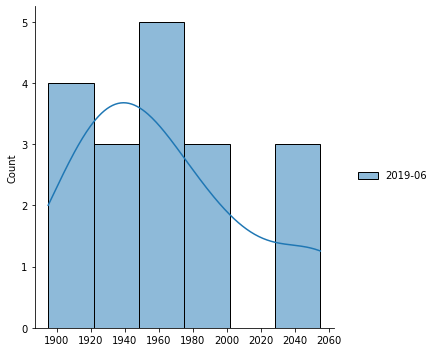

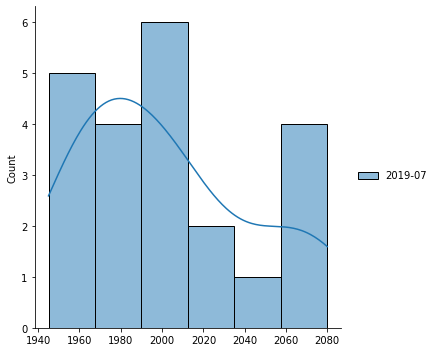

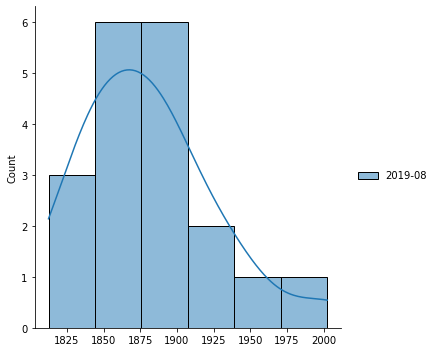

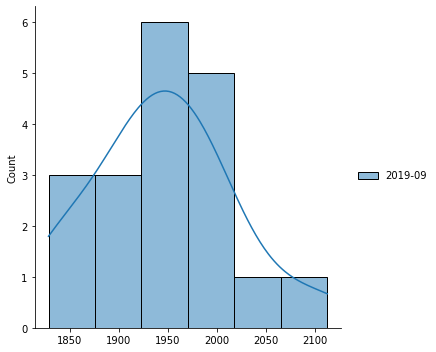

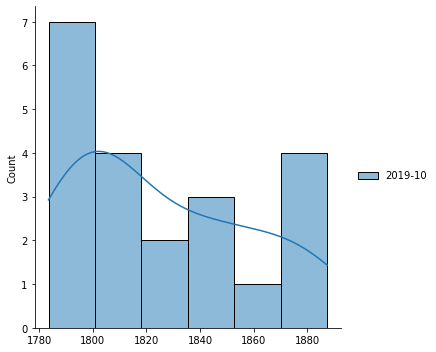

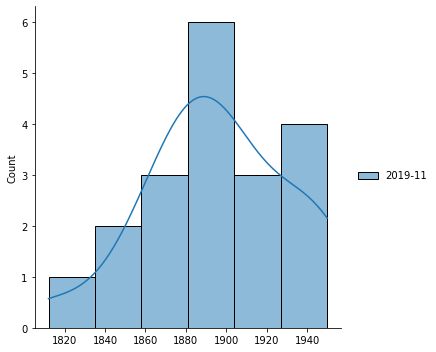

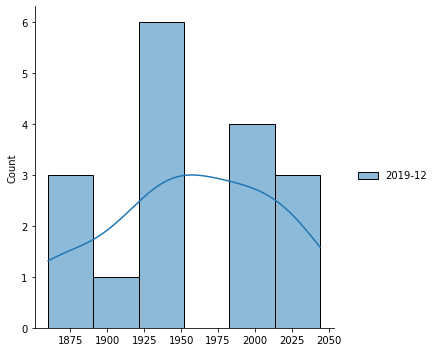

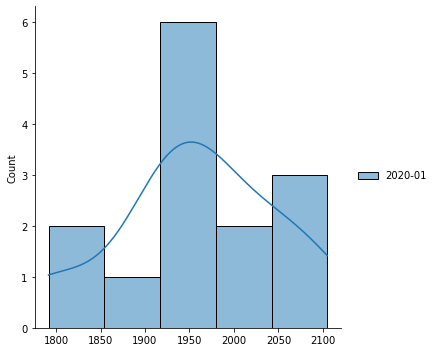

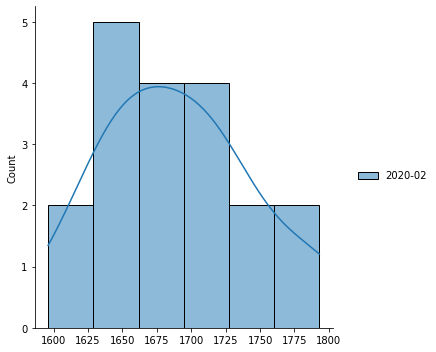

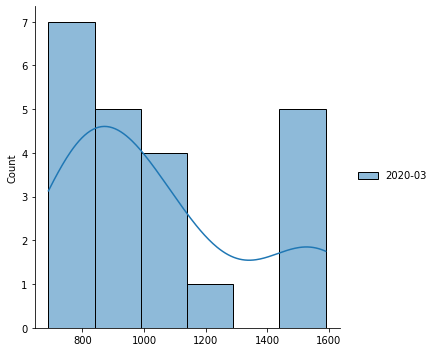

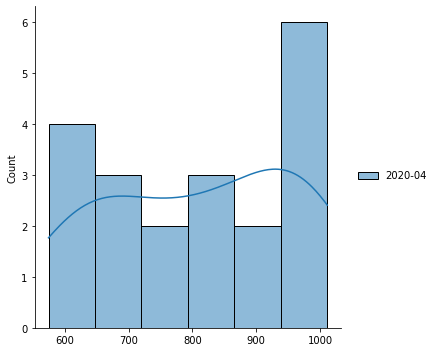

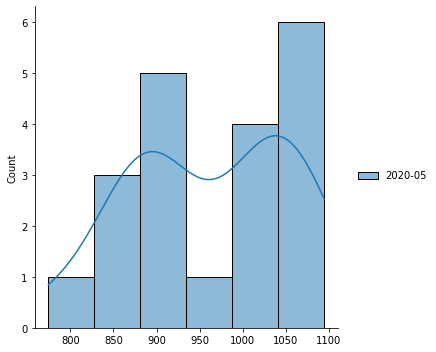

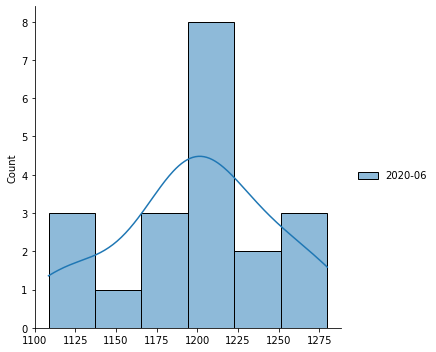

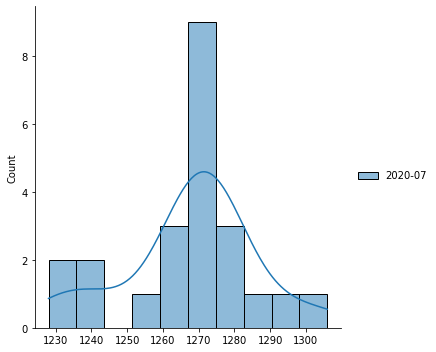

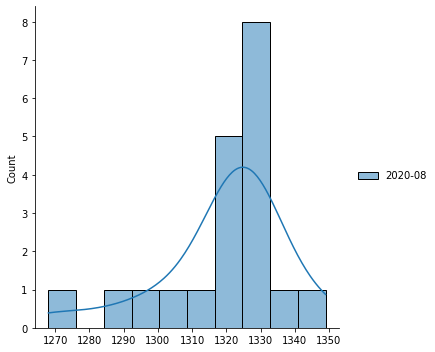

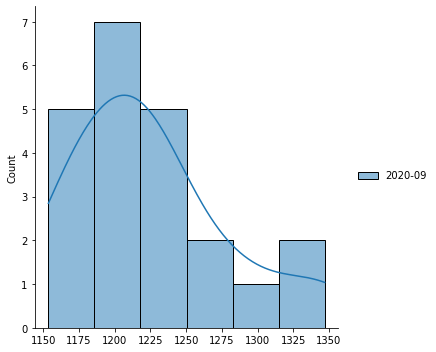

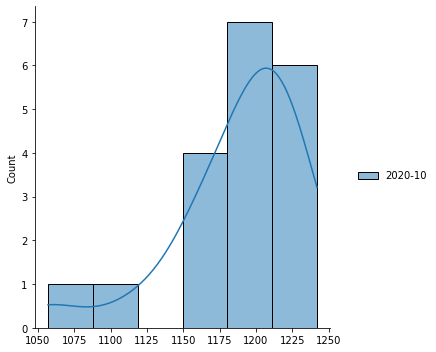

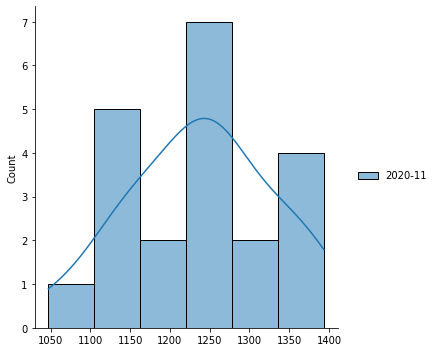

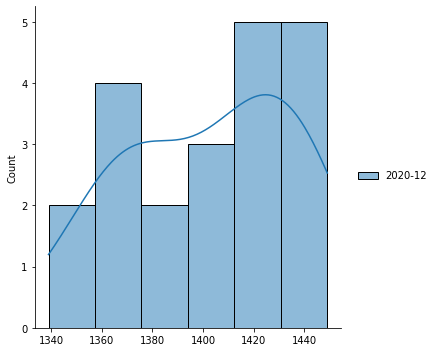

In [185]:
build_mon(df,mon_list)

In [186]:
#2018
BRF_2018Q3 = df['2018-07':'2018-09']['收盤價']
BRF_2018Q4 = df['2018-10':'2018-12']['收盤價']
#2019
BRF_2019Q1 = df['2019-01':'2019-03']['收盤價']
BRF_2019Q2 = df['2019-04':'2019-06']['收盤價']
BRF_2019Q3 = df['2019-07':'2019-09']['收盤價']
BRF_2019Q4 = df['2019-10':'2019-12']['收盤價']
#2020
BRF_2020Q1 = df['2020-01':'2020-03']['收盤價']
BRF_2020Q2 = df['2020-04':'2020-06']['收盤價']
BRF_2020Q3 = df['2020-07':'2020-09']['收盤價']
BRF_2020Q4 = df['2020-10':'2020-12']['收盤價']
BRF = [BRF_2018Q3,BRF_2018Q4,BRF_2019Q1,BRF_2019Q2,BRF_2019Q3,BRF_2019Q4,BRF_2020Q1,BRF_2020Q2,BRF_2020Q3,BRF_2020Q4]

Text(0.5, 1.0, '2020-10:2020-12')

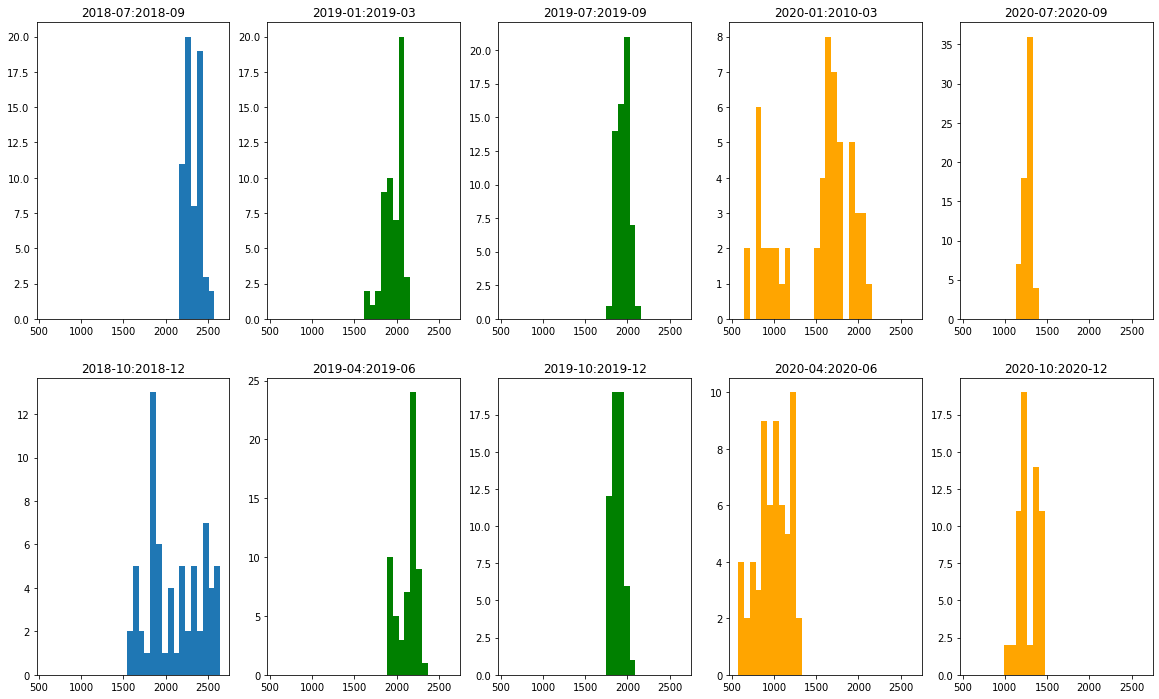

In [187]:
#,sharex=True,sharey=True
fig,axs = plt.subplots(nrows=2,ncols=5,figsize=(20,12))
axs[0,0].hist(BRF_2018Q3,bins=mbin,range=mrange)
axs[0,0].set_title("2018-07:2018-09")
axs[1,0].hist(BRF_2018Q4,bins=mbin,range=mrange)
axs[1,0].set_title("2018-10:2018-12")
axs[0,1].hist(BRF_2019Q1,bins=mbin,range=mrange,color='green')
axs[0,1].set_title("2019-01:2019-03")
axs[1,1].hist(BRF_2019Q2,bins=mbin,range=mrange,color='green')
axs[1,1].set_title("2019-04:2019-06")
axs[0,2].hist(BRF_2019Q3,bins=mbin,range=mrange,color='green')
axs[0,2].set_title("2019-07:2019-09")
axs[1,2].hist(BRF_2019Q4,bins=mbin,range=mrange,color='green')
axs[1,2].set_title("2019-10:2019-12")
axs[0,3].hist(BRF_2020Q1,bins=mbin,range=mrange,color='orange')
axs[0,3].set_title("2020-01:2010-03")
axs[1,3].hist(BRF_2020Q2,bins=mbin,range=mrange,color='orange')
axs[1,3].set_title("2020-04:2020-06")
axs[0,4].hist(BRF_2020Q3,bins=mbin,range=mrange,color='orange')
axs[0,4].set_title("2020-07:2020-09")
axs[1,4].hist(BRF_2020Q4,bins=mbin,range=mrange,color='orange')
axs[1,4].set_title("2020-10:2020-12")


In [188]:
for i in BRF:
  print(i.index[0],stats.normaltest(i))

2018-07-02 00:00:00 NormaltestResult(statistic=6.056297707853197, pvalue=0.0484051602635813)
2018-10-01 00:00:00 NormaltestResult(statistic=27.653044728301527, pvalue=9.890486018141975e-07)
2019-01-02 00:00:00 NormaltestResult(statistic=6.495549266151524, pvalue=0.038860590752542466)
2019-04-01 00:00:00 NormaltestResult(statistic=9.918303763719683, pvalue=0.00701887814682391)
2019-07-01 00:00:00 NormaltestResult(statistic=2.406405801343682, pvalue=0.3002310600317965)
2019-10-01 00:00:00 NormaltestResult(statistic=2.6305070739436602, pvalue=0.2684062637004776)
2020-01-02 00:00:00 NormaltestResult(statistic=11.521160387714907, pvalue=0.003149283873119645)
2020-04-01 00:00:00 NormaltestResult(statistic=3.8572775700259094, pvalue=0.14534591092078003)
2020-07-01 00:00:00 NormaltestResult(statistic=3.8738067577105166, pvalue=0.14414963617198082)
2020-10-05 00:00:00 NormaltestResult(statistic=13.210897180222528, pvalue=0.001352976105801037)


In [189]:
y1 = df[df['交易年分']=='2018']['收盤價']
y2 = df[df['交易年分']=='2019']['收盤價']
y3 = df[df['交易年分']=='2020']['收盤價']

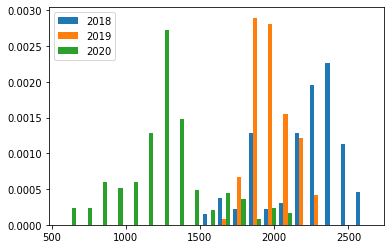

In [190]:
plt.hist([y1,y2,y3],bins=20,label=['2018','2019','2020'],density=True)
plt.legend(loc='upper left')

# 單根檢定

In [191]:
CPC_df = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/BRF_RawData/中油95_201807_202104.xlsx")

In [192]:
CPC_df = CPC_df.iloc[:30]
CPC_df = CPC_df['數值']

In [193]:
mon_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/BRF_RawData/BRF月均價 - 工作表1.csv")


In [194]:
mon_df = mon_df['每公升價格']

In [195]:
mon_df.head()

0    14.432399
1    14.236166
2    15.211208
3    15.675209
4    12.931279
Name: 每公升價格, dtype: float64

In [196]:
mon_list=['2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
          '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
          '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12']


In [197]:
df = pd.concat([pd.DataFrame(mon_list),mon_df.rename('BRF'),CPC_df.rename('CPC95')],axis=1,ignore_index=True)

In [198]:
df.columns=['mon_list','BRF','CPC95']

In [199]:
df = df.set_index('mon_list')

In [200]:
df.head(5)

,BRF,CPC95
mon_list,,
2018-07,14.432399,30.3
2018-08,14.236166,30.3
2018-09,15.211208,31.0
2018-10,15.675209,31.0
2018-11,12.931279,28.4


In [201]:
#df.to_csv('BRF_CPC95_每公升月均價.csv',encoding='big5')

<AxesSubplot:xlabel='mon_list'>

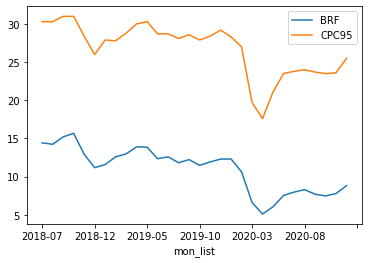

In [202]:
df.plot()

BRF跟中油95 (價格/公升)=>看起來趨勢一致


In [203]:
CPCf = df['CPC95']
BRFf = df['BRF']

In [204]:
CPCf_log = np.log(CPCf)
BRFf_log = np.log(BRFf) 

In [205]:
adf_CPC = ADF(CPCf_log)
adf_BRF = ADF(BRFf_log)

In [206]:
print(adf_BRF.summary(),"\n\n\n-------------我是分隔線-------------\n\n\n",adf_CPC.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.481
P-value                         0.543
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.70 (1%), -2.98 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 


-------------我是分隔線-------------


    Augmented Dickey-Fuller Results   
Test Statistic                 -2.451
P-value                         0.128
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.69 (1%), -2.97 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


無法拒絕虛無假說=>存在單根=>兩者的對數價格皆為非定態，有一定的趨勢


In [207]:
#要取[1:]是因為第一項不存在於前一項的差分，會變成NaN
ret_CPC = CPCf_log.diff()[1:]
ret_BRF = BRFf_log.diff()[1:]

In [208]:
adf_ret_CPC = ADF(ret_CPC)
adf_ret_BRF = ADF(ret_BRF)
print(adf_ret_BRF.summary(),adf_ret_CPC.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.776
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.70 (1%), -2.98 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.    Augmented Dickey-Fuller Results   
Test Statistic                 -4.604
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.70 (1%), -2.98 (5%), -2.63 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


拒絕虛無假說=>不存在單根=>兩者差分(一階整合序列)皆為定態

<AxesSubplot:xlabel='mon_list'>

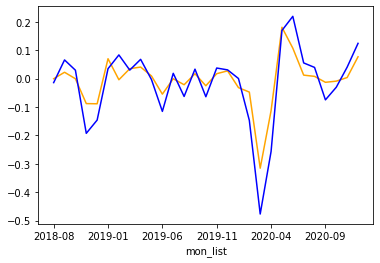

In [209]:
ret_CPC.plot(label='CPC95',style='orange')
ret_BRF.plot(label='BRF',style='blue')

# 共整合
在了解對數價格的差分序列是定態後，再來看是否存在共整合
=>看兩者對數價格差是否為定態


$log(P^Y_{t}) = \alpha +\beta \space log(P^X_{t})+\varepsilon_{t}$

$\rightarrow \varepsilon_{t} = log(P^Y_{t})-\alpha -\beta \space log(P^X_{t}) $

檢定一下$\varepsilon_{t}$是否為定態

In [210]:
import statsmodels.api as sm

In [211]:
model =sm.OLS(CPCf_log,sm.add_constant(BRFf_log))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  CPC95   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     574.5
Date:                Sat, 29 May 2021   Prob (F-statistic):           3.35e-20
Time:                        12:37:30   Log-Likelihood:                 63.074
No. Observations:                  30   AIC:                            -122.1
Df Residuals:                      28   BIC:                            -119.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1983      0.045     48.438      0.0

In [212]:
alpha,beta = result.params
alpha,beta

(2.1983454451516833, 0.4579678324923272)

$log(P^{中油95}_{t}) = 2.198 +0.458 \space log(P^{BRF}_{t})+\varepsilon_{t}$

In [213]:
spread = CPCf_log -beta*BRFf_log - alpha
pd.DataFrame(spread,columns=['spread'])

,spread
mon_list,
2018-07,-0.009732
2018-08,-0.003462
2018-09,-0.010962
2018-10,-0.024723
2018-11,-0.024193
2018-12,-0.045792
2019-01,0.008549
2019-02,-0.033465
2019-03,-0.012095


(-0.2, 0.2)

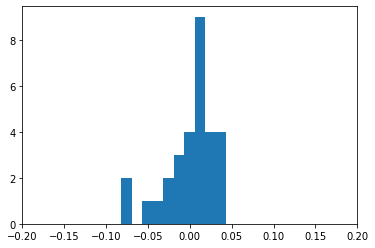

In [214]:
plt.hist(spread)
plt.xlim((-0.2,0.2))

In [215]:
#常態檢定
stats.normaltest(spread)

NormaltestResult(statistic=10.044316720859849, pvalue=0.00659028713280423)

有看到兩個離群值，分別是2020/03,2020/04

2020-03 $\space\space\space$-0.081915

2020-04	$\space\space\space$-0.077131

In [216]:
stats.ttest_1samp(spread,-0.0095,alternative='less') 

Ttest_1sampResult(statistic=1.7307926022267501, pvalue=0.9529411149998399)

In [217]:
adfSpread = ADF(spread,trend='nc')
print(adfSpread.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.194
P-value                         0.001
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.65 (1%), -1.95 (5%), -1.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


/usr/local/lib/python3.7/dist-packages/arch/unitroot/unitroot.py:470: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  FutureWarning,


拒絕虛無假說=>對數價格差存在定態，有共整合
